# Primeiro teste NBA de coleta de dados

## Implementando o tutorial

Importando as bibliotecas

In [24]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

Importando dados de 2018

In [25]:
req = requests.get('https://www.basketball-reference.com/leagues/NBA_2018_totals.html')
if req.status_code == 200:
    print('Requisição bem sucedida!')
    content = req.content

Requisição bem sucedida!


Criando objeto para salvar os dados

In [26]:
soup = BeautifulSoup(content, 'html.parser')
table = soup.find(name='table')

Carregando os dados no Data Frame

In [27]:
table_str = str(table)
df = pd.read_html(table_str)[0]

Obtendo as estatísticas entre 2013 e 2018

Implementando o método

In [28]:
def scrape_stats(base_url, year_start, year_end):
    years = range(year_start,year_end+1,1)

    final_df = pd.DataFrame()

    for year in years:
        print('Extraindo ano {}'.format(year))
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table', {'id':'totals_stats'})
        df = pd.read_html(str(table))[0]
        df['Year'] = year
        final_df = final_df.append(df)
    return final_df

Executando o método

In [29]:
url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'

df = scrape_stats(url, 2013, 2018)

Extraindo ano 2013
Extraindo ano 2014
Extraindo ano 2015
Extraindo ano 2016
Extraindo ano 2017
Extraindo ano 2018


Limpando os dados

In [30]:
drop_indexes = df[df['Rk'] == 'Rk'].index # Pega indexes onde a coluna 'Rk' possui valor 'Rk'
df.drop(drop_indexes, inplace=True) # elimina os valores dos index passados da tabela

Convertendo os dados da tabela para valores numéricos

In [31]:
numeric_cols = df.columns.drop(['Player','Pos','Tm'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

Criando gráfico de barras

<AxesSubplot:xlabel='Year', ylabel='3PA'>

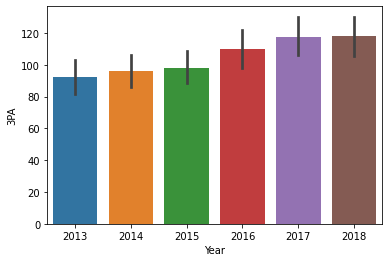

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Year', y='3PA', data=df)

---

## Ampliando a pesquisa para incluir dados até o ano de 2020

Estou utilizando o método **scrape_stats** criado na primeira coleta, porém alterando os parâmentros para irmos até o ano de 2020

In [33]:
url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'

df = scrape_stats(url, 2013, 2020)

Extraindo ano 2013
Extraindo ano 2014
Extraindo ano 2015
Extraindo ano 2016
Extraindo ano 2017
Extraindo ano 2018
Extraindo ano 2019
Extraindo ano 2020


Limpando os dados e convertendo os as informações da tabela para valores numéricos

In [34]:
drop_indexes = df[df['Rk'] == 'Rk'].index # Pega indexes onde a coluna 'Rk' possui valor 'Rk'
df.drop(drop_indexes, inplace=True) # elimina os valores dos index passados da tabela
numeric_cols = df.columns.drop(['Player','Pos','Tm'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

Refazendo o gráfico de barras

<AxesSubplot:xlabel='Year', ylabel='3PA'>

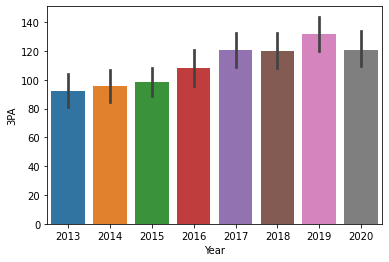

In [35]:
sns.barplot(x='Year', y='3PA', data=df)

Criando um Dataset para apresentar os valores no gráfico por linhas. Estou utilizando a função **groupby** do pandas no dataset **df** para agrupar os valores médios da coluna **Year**, e em seguida criando o gráfico de linha.

Text(0, 0.5, 'Média de bolas de 3 pontos')

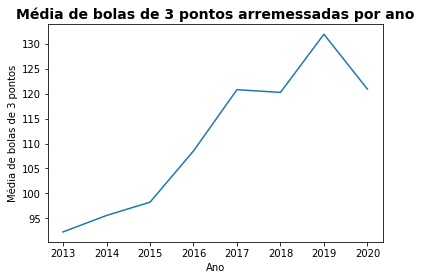

In [36]:
dfLinha=df.groupby('Year').mean()

sns.lineplot(x='Year', y='3PA', data=dfLinha)
plt.title('Média de bolas de 3 pontos arremessadas por ano',fontsize=14,weight='bold')
plt.xlabel('Ano')
plt.ylabel('Média de bolas de 3 pontos')

---

Opção com alteração no index do bando de dados original

Text(0, 0.5, 'Média de bolas de 3 pontos')

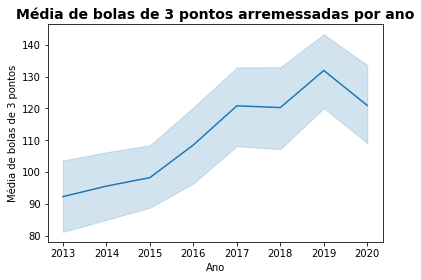

In [40]:
dfReindexado=df[:]
dfReindexado.reset_index(inplace=True)

sns.lineplot(x='Year', y='3PA', data=dfReindexado)
plt.title('Média de bolas de 3 pontos arremessadas por ano',fontsize=14,weight='bold')
plt.xlabel('Ano')
plt.ylabel('Média de bolas de 3 pontos')